In [11]:
import sys

from os.path import basename
from typing import Dict, Callable

from pathlib import Path
import pickle

import pandas as pd

from collections import namedtuple

%matplotlib inline

In [22]:
sys.path.append('/home/laugustyniak/github/phd/sentiment-backend/')
from aspects.analysis.nlp_architect import get_metrics

In [15]:
models_info_path = Path('../models-glove.840B.300d/')

In [16]:
models_info_path.absolute()

PosixPath('/home/laugustyniak/github/phd/nlp-architect/examples/aspect_extraction/notebooks/../models-glove.840B.300d')

In [26]:
models_paths = list(models_info_path.glob('*'))

In [27]:
models_paths[:2]

[PosixPath('../models-glove.840B.300d/model-info-word-bilstm-crf-15epochs-restaurants-train.conll.info'),
 PosixPath('../models-glove.840B.300d/model-info-char-word-bilstm-crf-15epochs-MicroMP3-train.conll.info')]

In [31]:
models_metrics = get_metrics(models_paths, lambda d: '50epoch' in d.as_posix())

In [32]:
models_metrics

{'model-info-char-word-bilstm-crf-50epochs-Linksys Router-train.conll': Metrics(precision=49.122807017543856, recall=31.818181818181817, f1=38.62068965517242),
 'model-info-char-word-bilstm-crf-50epochs-norton-train.conll': Metrics(precision=38.55421686746988, recall=33.68421052631579, f1=35.95505617977528),
 'model-info-char-word-bilstm-crf-50epochs-Hitachi router-train.conll': Metrics(precision=51.06382978723404, recall=30.76923076923077, f1=38.4),
 'model-info-char-word-bilstm-crf-50epochs-Canon S100-train.conll': Metrics(precision=47.16981132075472, recall=27.77777777777778, f1=34.96503496503497),
 'model-info-char-word-bilstm-crf-50epochs-Canon PowerShot SD500-train.conll': Metrics(precision=54.054054054054056, recall=30.76923076923077, f1=39.21568627450981),
 'model-info-char-word-bilstm-crf-50epochs-Computer-train.conll': Metrics(precision=52.59259259259259, recall=52.98507462686567, f1=52.78810408921933),
 'model-info-char-word-bilstm-crf-50epochs-Canon G3-train.conll': Metrics

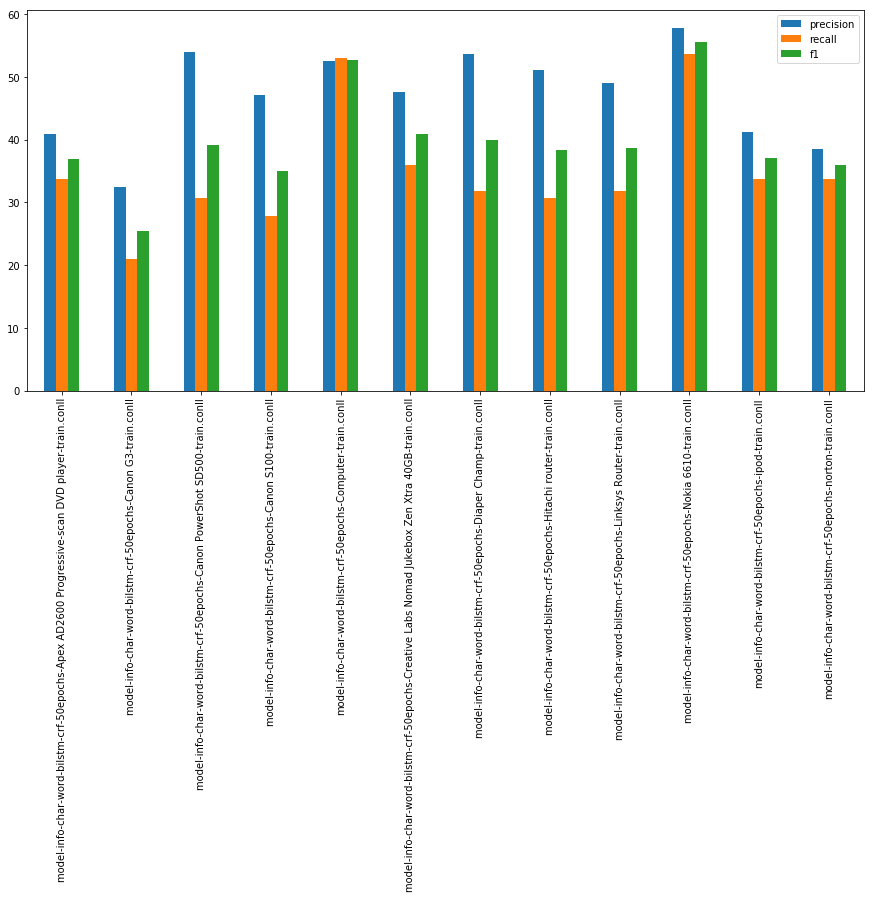

In [33]:
pd.DataFrame.from_dict(models_metrics, orient='index').sort_index(axis=0).plot(kind='bar', figsize=(15,7))